# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress

# Import API key
from hw6_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
new_cities = []
lat = []
lng = []
date = []
temp = []
humidity = []
clouds = []
wind = []
country = []
record = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        date.append(response['dt'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print(f"Processing Record {record} | {city}")
        record += 1
        new_cities.append(city)
    except:
        print("City not found. Skipping...")

Processing Record 1 | mar del plata
Processing Record 2 | praia da vitoria
Processing Record 3 | clyde river
Processing Record 4 | punta arenas
Processing Record 5 | hobart
Processing Record 6 | alyangula
Processing Record 7 | port alfred
Processing Record 8 | rikitea
Processing Record 9 | jedrzejow
Processing Record 10 | avarua
Processing Record 11 | lorengau
Processing Record 12 | mandalgarh
City not found. Skipping...
Processing Record 13 | katsuura
Processing Record 14 | haines junction
City not found. Skipping...
Processing Record 15 | pevek
Processing Record 16 | saint-francois
Processing Record 17 | west freehold
Processing Record 18 | buraydah
Processing Record 19 | fairbanks
Processing Record 20 | ushuaia
Processing Record 21 | castro
Processing Record 22 | townsville
Processing Record 23 | beloha
Processing Record 24 | calnali
Processing Record 25 | vaini
Processing Record 26 | busselton
Processing Record 27 | northam
Processing Record 28 | jamestown
Processing Record 29 | ta

Processing Record 230 | martil
Processing Record 231 | agadez
Processing Record 232 | necochea
Processing Record 233 | kahului
Processing Record 234 | celendin
Processing Record 235 | san patricio
Processing Record 236 | forestville
Processing Record 237 | moerai
Processing Record 238 | tuatapere
Processing Record 239 | prince rupert
Processing Record 240 | coahuayana
City not found. Skipping...
Processing Record 241 | kalabo
Processing Record 242 | russell
Processing Record 243 | vestmanna
Processing Record 244 | nome
Processing Record 245 | galle
Processing Record 246 | canaries
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 247 | kjollefjord
Processing Record 248 | fort nelson
Processing Record 249 | hasaki
Processing Record 250 | husavik
Processing Record 251 | cervo
Processing Record 252 | saint anthony
Processing Record 253 | longyearbyen
Processing Record 254 | nidadavole
Processing Record 255 | iturama
Processing Record 256

Processing Record 458 | bilma
Processing Record 459 | apomu
Processing Record 460 | los llanos de aridane
Processing Record 461 | kabanjahe
Processing Record 462 | quba
Processing Record 463 | samarai
Processing Record 464 | akdepe
City not found. Skipping...
Processing Record 465 | mtambile
Processing Record 466 | rodos
Processing Record 467 | roebourne
Processing Record 468 | znamenskoye
Processing Record 469 | saldanha
Processing Record 470 | plettenberg bay
City not found. Skipping...
Processing Record 471 | adrar
Processing Record 472 | staryy nadym
Processing Record 473 | boali
Processing Record 474 | lata
Processing Record 475 | kashan
Processing Record 476 | sao desiderio
Processing Record 477 | zhezkazgan
City not found. Skipping...
Processing Record 478 | menongue
Processing Record 479 | richards bay
Processing Record 480 | rio grande
Processing Record 481 | oranjemund
Processing Record 482 | emerald
City not found. Skipping...
Processing Record 483 | sorland
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": new_cities,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [7]:
weather_data['Date'] = pd.to_datetime(weather_data['Date'], unit='s')
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mar del plata,54,AR,2020-04-03 02:29:35,72,-38.00,-57.56,61.00,6.93
1,praia da vitoria,40,PT,2020-04-03 02:30:33,87,38.73,-27.07,60.80,16.98
2,clyde river,1,CA,2020-04-03 02:30:33,69,70.47,-68.59,-13.00,6.93
3,punta arenas,20,CL,2020-04-03 02:29:29,81,-53.15,-70.92,48.20,16.11
4,hobart,75,AU,2020-04-03 02:30:02,55,-42.88,147.33,66.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

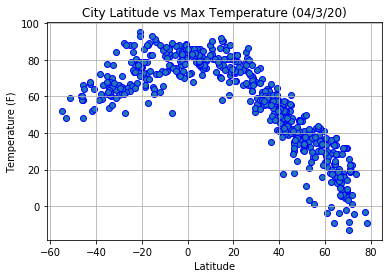

In [8]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']

fig1 = plt.figure()
plt.scatter(x_values,y_values,linewidths='1',edgecolors='b')
plt.title('City Latitude vs Max Temperature (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()

fig1.savefig("LatVsTemp.png")

The code is ploting each city's latitudes and maximum temperature on the specified date to show the relationship between the two. The above figure shows that temperature is usually higher the closer latitude is to 0.

#### Latitude vs. Humidity Plot

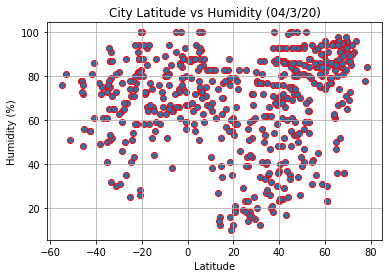

In [9]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']

fig2 = plt.figure()

plt.scatter(x_values,y_values,linewidths='1',edgecolors='r')
plt.title('City Latitude vs Humidity (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

fig2.savefig("LatVsHum.png")

The code is ploting each city's latitude and humidity on the specified date to show their relationship. The above figure shows that humidity is not very dependent on latitude.

#### Latitude vs. Cloudiness Plot

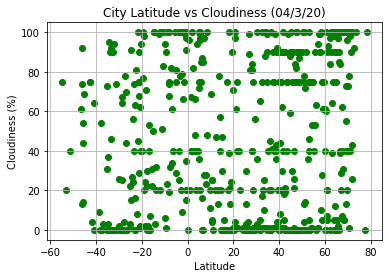

In [10]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']

fig3 = plt.figure()

plt.scatter(x_values,y_values, c='g', linewidths='1')
plt.title('City Latitude vs Cloudiness (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

fig3.savefig("LatVsClds.png")

The code is ploting each city's latitude and cloudiness on the specified date to show their relationship. The above figure shows that cloudiness is not very dependent on latitude.

#### Latitude vs. Wind Speed Plot

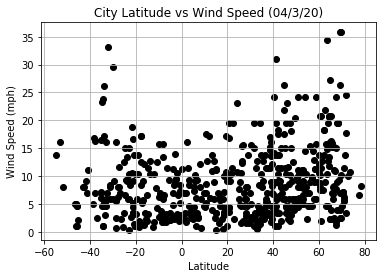

In [11]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']

fig4 = plt.figure()

plt.scatter(x_values,y_values, c='k', linewidths='1')
plt.title('City Latitude vs Wind Speed (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

fig4.savefig("LatVsWind.png")

The code is ploting each city's latitude and wind speed on the specified date to show their relationship. The above figure shows that wind speed has a slightly positive correlation with latitude.

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots

def reg_plts(hemisphere, condition, title, y_label):
    if hemisphere == 'north':
        cond = (weather_data['Lat'] >= 0)
    elif hemisphere == 'south':
        cond = (weather_data['Lat'] < 0)
    else:
        print('First arguement must be north or south')
    
    data = weather_data[cond]
    
    x_values = data['Lat']
    y_values = data[condition]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
    print(f"{line_eq}")

    plt.scatter(x_values,y_values,linewidths='1',edgecolors='b')
    plt.plot(x_values,regress_values,"r-")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.grid()
    plt.show()
    
    return

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north_cond = (weather_data['Lat'] >= 0)
south_cond = (weather_data['Lat'] < 0)

north_data = weather_data[north_cond]
south_data = weather_data[south_cond]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

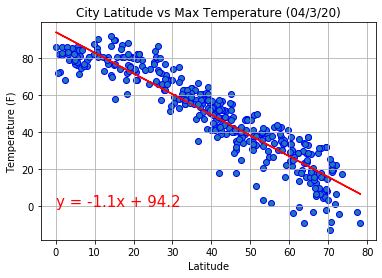

In [21]:
x_values = north_data['Lat']
y_values = north_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values,linewidths='1',edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title('City Latitude vs Max Temperature (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()
#print(f"{line_eq}")

y = -1.1x + 94.2


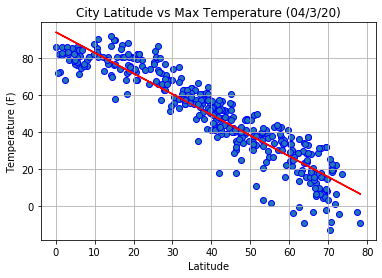

In [16]:
reg_plts('north', 'Max Temp', 'City Latitude vs Max Temperature (04/3/20)', 'Temperature (F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

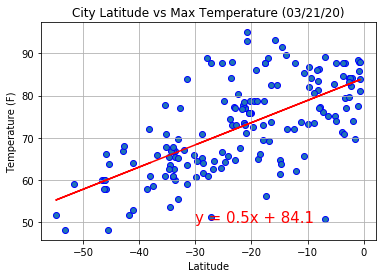

In [22]:
x_values = south_data['Lat']
y_values = south_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values,linewidths='1',edgecolors='b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.title('City Latitude vs Max Temperature (03/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.show()
#print(f"{line_eq}")

y = 0.5x + 84.1


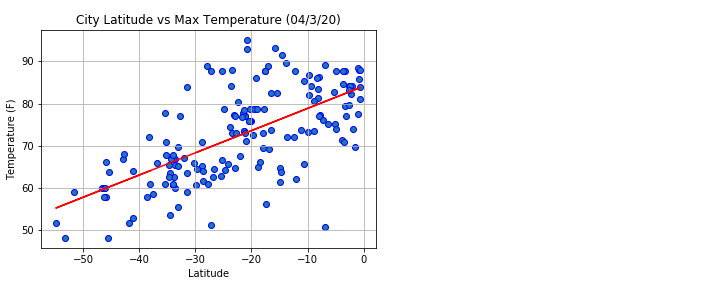

In [23]:
reg_plts('south', 'Max Temp', 'City Latitude vs Max Temperature (04/3/20)', 'Temperature (F)')

Both regressions clearly show that temperature has an absolute negative correlation to latitude. So the closer to 0, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

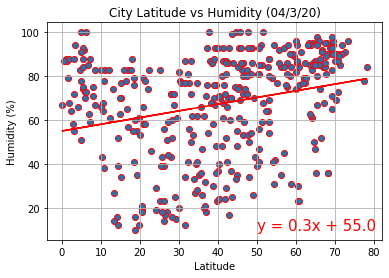

In [24]:
x_values = north_data['Lat']
y_values = north_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values,linewidths='1',edgecolors='r')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 10),fontsize=15,color="red")
plt.title('City Latitude vs Humidity (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
#print(f"{line_eq}")

y = 0.3x + 55.0


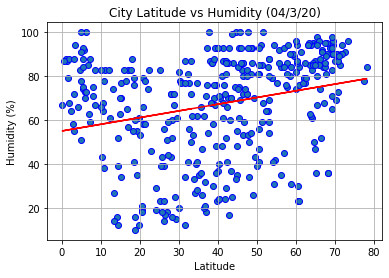

In [27]:
reg_plts('north', 'Humidity', 'City Latitude vs Humidity (04/3/20)', 'Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

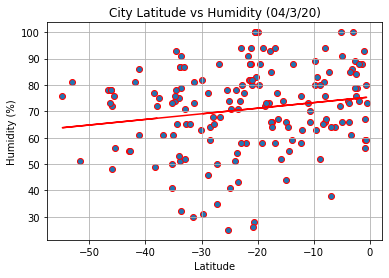

In [30]:
x_values = south_data['Lat']
y_values = south_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values,linewidths='1',edgecolors='r')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")
plt.title('City Latitude vs Humidity (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
#print(f"{line_eq}")

y = 0.2x + 75.4


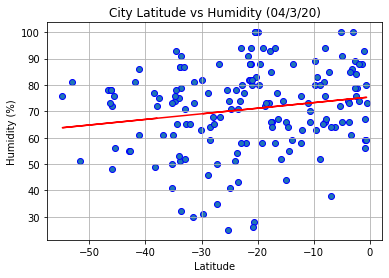

In [29]:
reg_plts('south', 'Humidity', 'City Latitude vs Humidity (04/3/20)', 'Humidity (%)')

The correlation between latitude and humidity is showing a slightly positive correlation, but it is small enough that it could probably be discounted.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

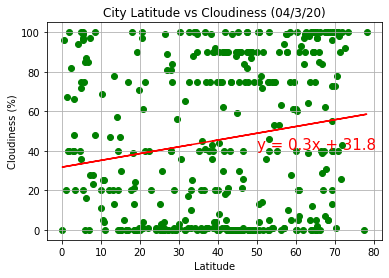

In [31]:
x_values = north_data['Lat']
y_values = north_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values, c='g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 41),fontsize=15,color="red")
plt.title('City Latitude vs Cloudiness (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
#print(f"{line_eq}")

y = 0.3x + 31.8


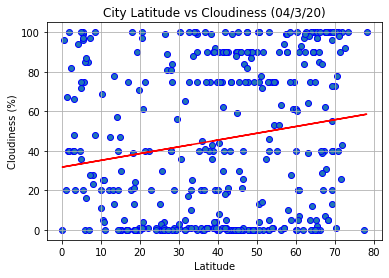

In [32]:
reg_plts('north', 'Cloudiness', 'City Latitude vs Cloudiness (04/3/20)', 'Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

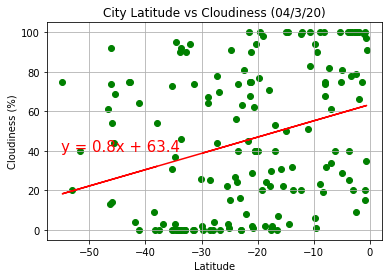

In [33]:
x_values = south_data['Lat']
y_values = south_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values, c='g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 40),fontsize=15,color="red")
plt.title('City Latitude vs Cloudiness (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
#print(f"{line_eq}")

y = 0.8x + 63.4


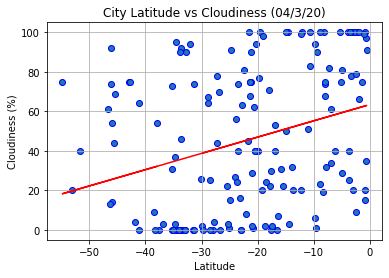

In [34]:
reg_plts('south', 'Cloudiness', 'City Latitude vs Cloudiness (04/3/20)', 'Cloudiness (%)')

The correlation between latitude and cloudiness, similar to humidity (which makes sense, moisture in the air) is showing a slightly positive correlation, but it is small enough that it could probably be discounted.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

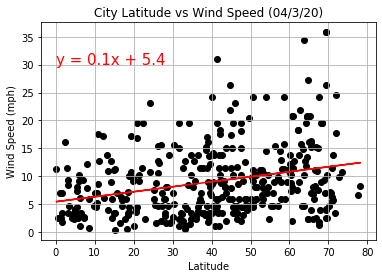

In [35]:
x_values = north_data['Lat']
y_values = north_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values, c='k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 30),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
#print(f"{line_eq}")

y = 0.1x + 5.4


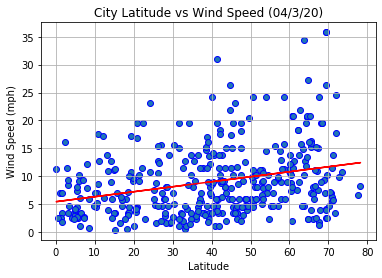

In [36]:
reg_plts('north', 'Wind Speed', 'City Latitude vs Wind Speed (04/3/20)', 'Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

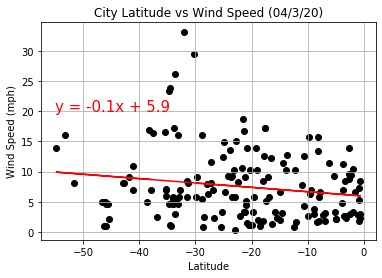

In [37]:
x_values = south_data['Lat']
y_values = south_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values, c='k')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('City Latitude vs Wind Speed (04/3/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
#print(f"{line_eq}")

y = -0.1x + 5.9


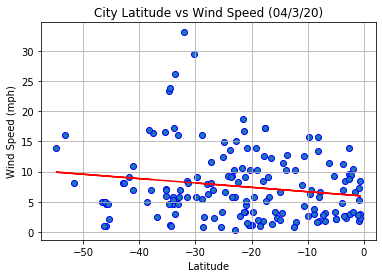

In [38]:
reg_plts('south', 'Wind Speed', 'City Latitude vs Wind Speed (04/3/20)', 'Wind Speed (mph)')

Wind speed seems to have the opposite correlation to latitude as temperature, seeming to be slightly absolute positive, meaning that the further from 0 latitude, the greater the wind speed.